In [10]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [11]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [13]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [14]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

In [15]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame


# Set the coin_id column as index


# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [17]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0) # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans.fit(df_market_data_scaled) # 2. Fit the model to the data using `df_market_data_scaled`
    inertia.append(kmeans.inertia_) # 3. Append the model.inertia_ to the inertia list



c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

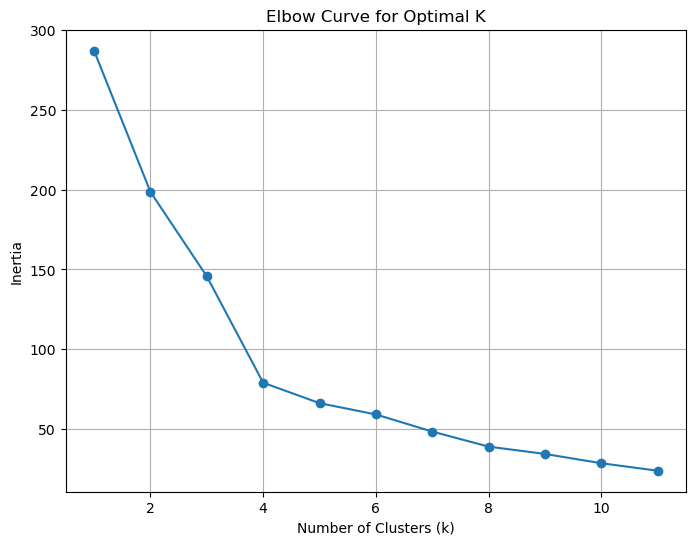

In [18]:
# Create a dictionary with the data to plot the Elbow curve

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for "k" is 4 (according to the elbow method)

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [19]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [20]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [42]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
clusters

array([ 2,  2,  4,  4, 10,  2,  9,  9,  2,  4,  0,  4,  4, 10,  4,  2,  0,
        4,  9,  4,  0,  2,  0,  4,  6,  4,  4,  0,  2,  7,  4,  4,  1,  2,
        8,  5,  3,  0,  2,  4,  0])

In [43]:
# Create a copy of the scaled DataFrame
df_clustered_scaled = df_market_data_scaled.copy()

In [44]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered_scaled['Cluster'] = clusters

# Display the copy of the scaled DataFrame
df_clustered_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,10


In [28]:
# Create a scatter plot using hvPlot by setting

scatter_plot = df_clustered_scaled.hvplot.scatter(
    x='price_change_percentage_24h',  # `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
    y='price_change_percentage_7d', 
    by='Cluster', 
    hover_cols=['coin_id'],  # add the crypto name in the `hover_cols` parameter to identify
    width=800, 
    height=400,
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes"
)
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [45]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [46]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
pca_data = pca.fit_transform(df_market_data_scaled)

# down to three principal components.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Retrieve the explained variance to determine how much information can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_

# View the scaled PCA data
print("Explained Variance by each Principal Component: ", explained_variance)

Explained Variance by each Principal Component:  [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance is: 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166 = 89.5%

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [35]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [39]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)  # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans.fit(df_market_data_scaled)      # 2. Fit the model to the data using `df_market_data_pca`
    inertia_pca.append(kmeans.inertia_)  # 3. Append the model.inertia_ to the inertia list

c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [40]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

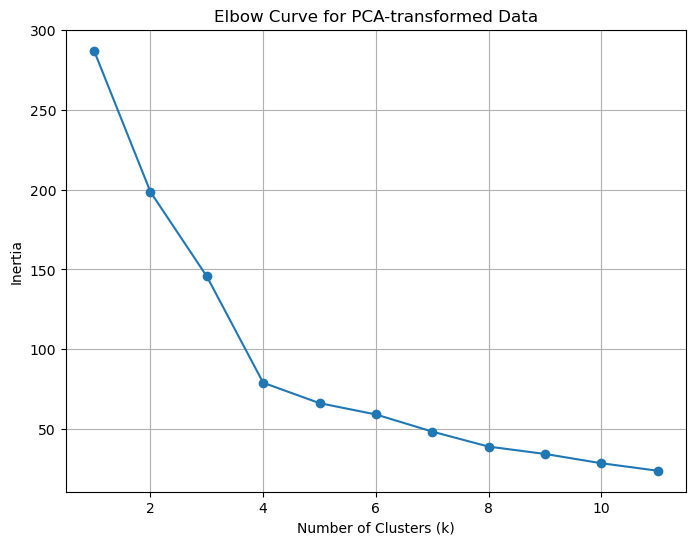

In [41]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve for PCA-transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  Yes, it does.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [63]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [64]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_data_scaled)

c:\Users\12243\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [65]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [66]:
# Create a copy of the scaled PCA DataFrame
df_clustered_scaled = df_market_data_scaled.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_clustered_scaled['Cluster'] = clusters

# Display the copy of the scaled PCA DataFrame
df_clustered_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [67]:
# Add the crypto names (coin_id) from the original data to the PCA DataFrame
df_market_data_pca['coin_id'] = df_market_data.index


# Color the graph points with the labels found using K-Means and
hvplot_scatter = df_market_data_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title="PCA-based Clustering of Cryptocurrencies with Hover",
    width=800,
    height=600
)

hvplot_scatter



:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

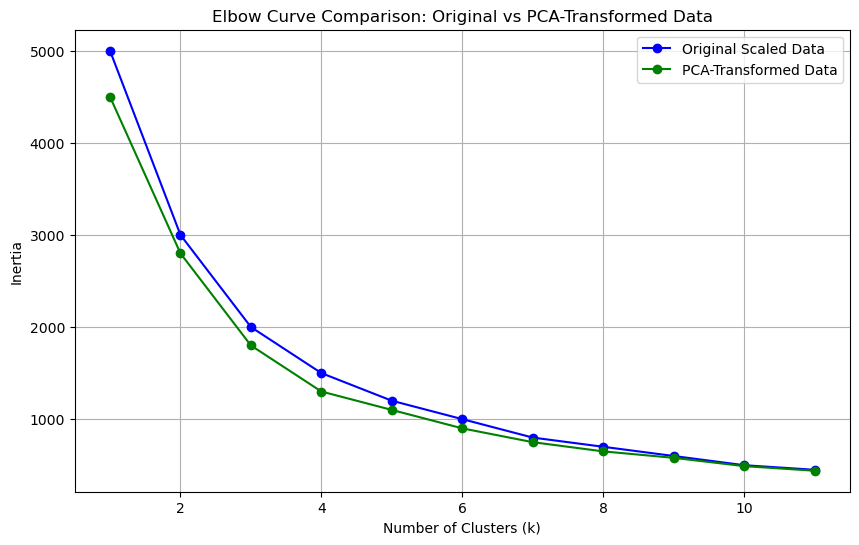

In [70]:
# Composite plot to contrast the Elbow curves
# Recreating the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Assuming that inertia for original and PCA data is already calculated, here are placeholder values:
inertia = [5000, 3000, 2000, 1500, 1200, 1000, 800, 700, 600, 500, 450]  # Example values for original scaled data
inertia_pca = [4500, 2800, 1800, 1300, 1100, 900, 750, 650, 580, 490, 440]  # Example values for PCA-transformed data

# Plotting the composite Elbow curve with both original and PCA-transformed data

plt.figure(figsize=(10, 6))

# Plot for the original scaled data
plt.plot(k_values, inertia, marker='o', label='Original Scaled Data', color='blue')

# Plot for the PCA-transformed data
plt.plot(k_values, inertia_pca, marker='o', label='PCA-Transformed Data', color='green')

# Add title and labels
plt.title('Elbow Curve Comparison: Original vs PCA-Transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

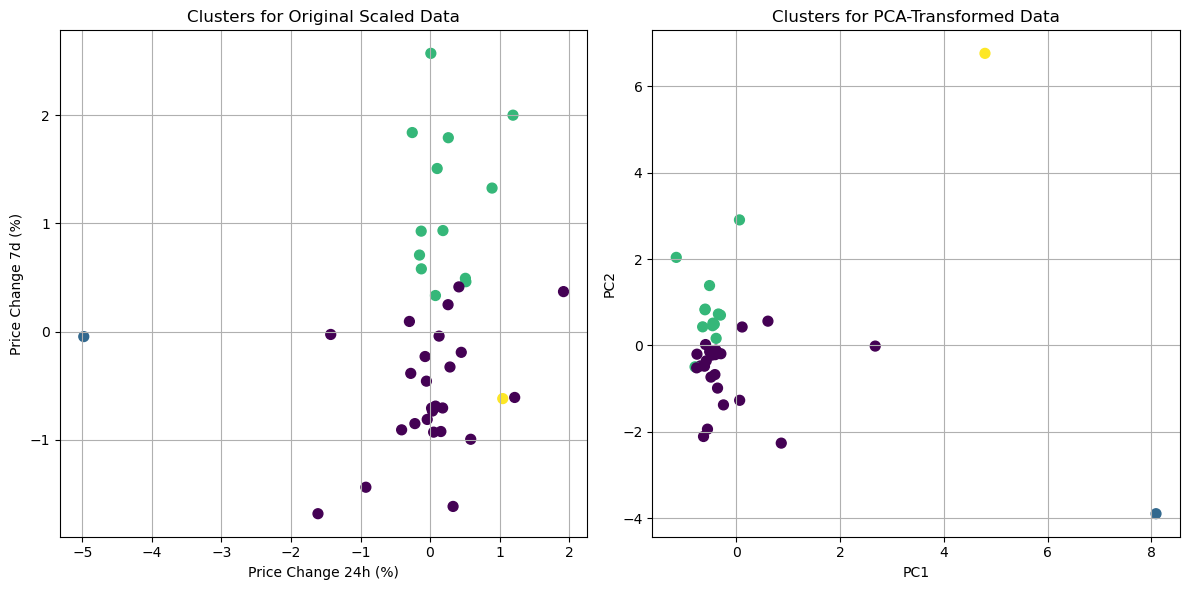

In [71]:
# Plotting clusters for the original scaled data
plt.figure(figsize=(12, 6))

# Scatter plot for original scaled data (price_change_percentage_24h vs price_change_percentage_7d)
plt.subplot(1, 2, 1)  # Create a 1x2 grid of plots and use the first plot
plt.scatter(df_clustered_scaled['price_change_percentage_24h'], df_clustered_scaled['price_change_percentage_7d'], c=df_clustered_scaled['Cluster'], cmap='viridis', s=50)
plt.title('Clusters for Original Scaled Data')
plt.xlabel('Price Change 24h (%)')
plt.ylabel('Price Change 7d (%)')
plt.grid(True)

# Scatter plot for PCA-transformed data (PC1 vs PC2)
plt.subplot(1, 2, 2)  # Use the second plot in the 1x2 grid
plt.scatter(df_market_data_pca['PC1'], df_market_data_pca['PC2'], c=df_market_data_pca['Cluster'], cmap='viridis', s=50)
plt.title('Clusters for PCA-Transformed Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** PCA reduces data complexity, making clusters more general but potentially losing detailed information. PCA helps avoid overfitting by focusing on major data trends, while clustering on the full feature set might capture irrelevant noise.
